In [15]:
%matplotlib inline     
# 有了上面这个，就不需要show调用来显示图了
import pandas as pd
import numpy as np
import matplotlib as mpl    # 主要是为了修改一些参数
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

# 数据可视化工具
Gelman and Unwin 2011:
>A well-designed graph can display more information than a table of the same size, and more information than numbers embedded in text. Graphical displays allow and encourage direct visual comparisons.

* matplotlib
* seaborn
* PyX
* Bokeh
* ...

## matplotlib
    ipython notebook --pylab
    
    import matplotlib.pyplot as plt

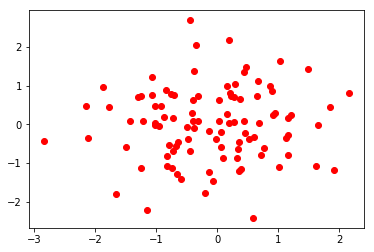

In [2]:
plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'ro')

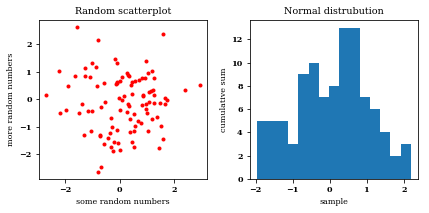

In [3]:
with mpl.rc_context(rc={'font.family': 'serif', 'font.weight': 'bold', 'font.size': 8}):
    fig = plt.figure(figsize=(6,3))
    ax1 = fig.add_subplot(121)
    ax1.set_xlabel('some random numbers')
    ax1.set_ylabel('more random numbers')
    ax1.set_title("Random scatterplot")
    plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'r.')
    ax2 = fig.add_subplot(122)
    plt.hist(np.random.normal(size=100), bins=15)
    ax2.set_xlabel('sample')
    ax2.set_ylabel('cumulative sum')
    ax2.set_title("Normal distrubution")
    plt.tight_layout()
    plt.savefig("normalvars.png", dpi=150)

matplotlib是相对底层的绘图包，但是它也意味着灵活性。Pandas整合了matplotlib的功能，针对series以及DataFrame对象都提供了绘图功能.

## Pandas中的数据可视化

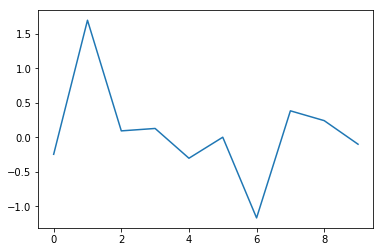

In [4]:
normals = pd.Series(np.random.normal(size=10))
normals.plot()

In [8]:
np.random.normal?

In [9]:
normals

0    0.773660
1    1.517423
2    0.655454
3    0.564990
4   -0.334805
5    2.125691
6    0.291731
7   -0.240961
8   -0.214155
9   -1.069460
dtype: float64

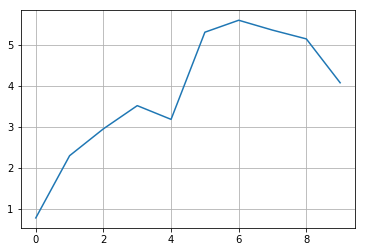

In [11]:
normals.cumsum().plot(grid=True)      # 先是累计求和，然后再绘图，并且绘制网格线。

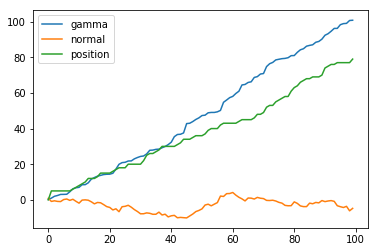

In [13]:
variables = pd.DataFrame({'normal':np.random.normal(size=100), 'gamma':np.random.gamma(1, size=100), 'position':np.random.poisson(size=100)})
variables.cumsum(0).plot()    # 0表示index方向，每一列各自求和

In [14]:
variables.cumsum(0)

,gamma,normal,position
0,0.225275,0.848572,0.0
1,0.958247,-0.900433,5.0
2,1.988396,-0.543995,5.0
3,2.438607,-0.878886,5.0
4,3.036415,-0.974517,5.0
...,...,...,...
95,98.307887,-3.851674,77.0
96,98.906436,-4.304966,77.0
97,99.042707,-3.651496,77.0
98,100.663956,-6.169505,77.0


### 多个subplot

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7e9f9c62e8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7e9f9edc18>], dtype=object)

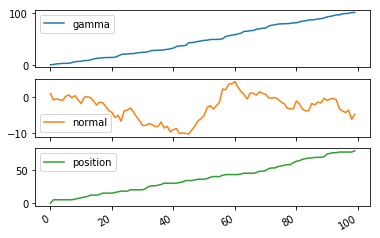

In [16]:
variables.cumsum(0).plot(subplots=True)    # 通过在plot方法里面指定subplots这个参数为True来实现独立绘图。

### 第二坐标轴

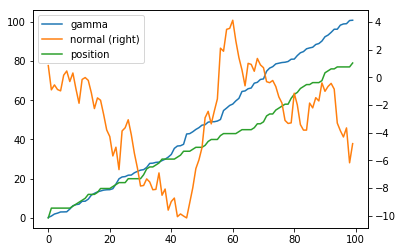

In [17]:
variables.cumsum(0).plot(secondary_y='normal')   # 这样的话，两个图的y的范围在一起。更容易放在一起比较。